In [1]:
from preprocess import *
from swishnet import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split 
from datetime import datetime

In [2]:
train_dataset = pd.read_hdf('pre-processed-dataset/train_cnn.h5',key='traindf')
train_dataset.head()

,feature,class_label
3628,"[[-315.69653, -319.03522, -318.50815, -253.510...",1
2776,"[[-158.27007, -119.907684, -102.25988, -104.65...",1
6332,"[[-112.1185, -98.449234, -91.65438, -83.300896...",0
22,"[[-221.18001, -246.14166, -298.0752, -379.7066...",0
5029,"[[-397.11258, -398.11328, -405.4104, -407.1128...",1


In [3]:
validation_dataset = pd.read_hdf('pre-processed-dataset/validation_cnn',key='valdf')
validation_dataset.head()

,feature,class_label
275,"[[-338.5306, -344.10248, -366.1368, -372.44083...",1
1095,"[[-147.2523, -144.39369, -159.58073, -195.2328...",1
1262,"[[-330.6287, -309.19095, -259.31378, -107.7429...",1
746,"[[-227.75717, -188.66824, -179.99754, -188.734...",0
254,"[[-96.9004, -100.59164, -106.09869, -101.88948...",0


In [4]:
#Further Preprocessing
X_train = np.array(train_dataset.feature.tolist())
y_train = np.array(train_dataset.class_label.tolist())
X_validation = np.array(validation_dataset.feature.tolist())
y_validation = np.array(validation_dataset.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy_train = to_categorical(le.fit_transform(y_train))
yy_validation = to_categorical(le.fit_transform(y_validation))

In [5]:
#Data reshaping for CNN Architecture
num_rows = 40 
num_columns = 87 
X_train = X_train.reshape(X_train.shape[0], num_rows, num_columns) 
X_validation = X_validation.reshape(X_validation.shape[0], num_rows, num_columns)
num_labels = yy_train.shape[1]

In [6]:
model = SwishNet(input_shape=(40,87), classes=2,width_multiply=2) #SwishNet Wide
# Compile the model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
# Display model architecture summary
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40, 87)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 40, 16)       4192        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 40, 16)       4192        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 40, 16)       8368        input_1[0][0]                    
_______________________________________________________________________________________

In [7]:
num_epochs = 15
num_batch_size = 32
start = datetime.now()
history = model.fit(X_train, yy_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_validation, yy_validation), verbose=1)
duration = datetime.now() - start 
print("Training completed in time: ", duration)

Epoch 1/15
437/437 [==============================] - 10s 23ms/step - loss: 0.4738 - accuracy: 0.7542 - val_loss: 0.3657 - val_accuracy: 0.8362
Epoch 2/15
437/437 [==============================] - 10s 23ms/step - loss: 0.2792 - accuracy: 0.8806 - val_loss: 0.2529 - val_accuracy: 0.8928
Epoch 3/15
437/437 [==============================] - 10s 23ms/step - loss: 0.1943 - accuracy: 0.9222 - val_loss: 0.2068 - val_accuracy: 0.9144
Epoch 4/15
437/437 [==============================] - 9s 21ms/step - loss: 0.1440 - accuracy: 0.9459 - val_loss: 0.1809 - val_accuracy: 0.9303
Epoch 5/15
437/437 [==============================] - 10s 23ms/step - loss: 0.1185 - accuracy: 0.9549 - val_loss: 0.1819 - val_accuracy: 0.9299
Epoch 6/15
437/437 [==============================] - 10s 24ms/step - loss: 0.0966 - accuracy: 0.9636 - val_loss: 0.1185 - val_accuracy: 0.9522
Epoch 7/15
437/437 [==============================] - 11s 24ms/step - loss: 0.0813 - accuracy: 0.9713 - val_loss: 0.1354 - val_accuracy: 

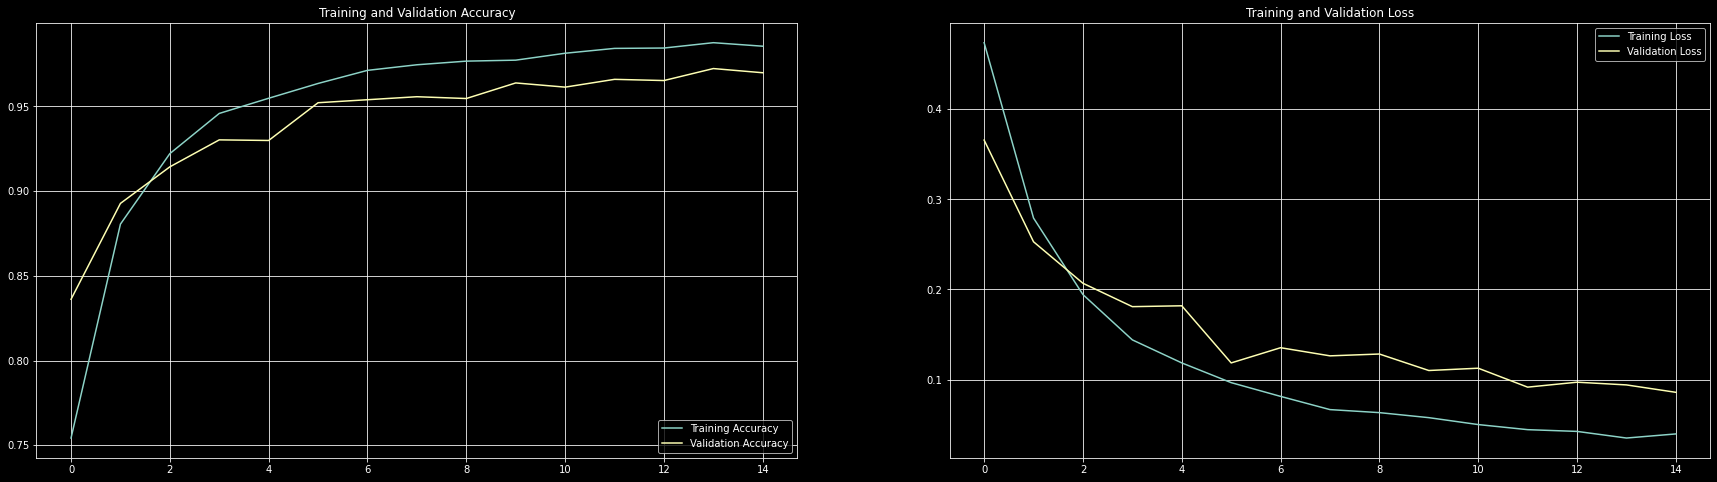

In [8]:
plt.style.use('dark_background')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.grid()
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
# Evaluating the model on the training and validation set
score = model.evaluate(X_train, yy_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))

score = model.evaluate(X_validation, yy_validation, verbose=0)
print("Validation Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 99.25%
Validation Accuracy: 96.99%


In [11]:
combined_test_dataset = pd.read_hdf('pre-processed-dataset/combined_cnn_test',key='testdf')

In [12]:
#Testing on the test dataset (unseen data)
X_test = np.array(combined_test_dataset.feature.tolist())
y_test = np.array(combined_test_dataset.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy_test = to_categorical(le.fit_transform(y_test))

In [13]:
X_test = X_test.reshape(X_test.shape[0], num_rows, num_columns) 

In [14]:
score = model.evaluate(X_test, yy_test, verbose=1) 
accuracy = 100*score[1]
print("Testing accuracy(unseen data): %.4f%%" % accuracy)

34/34 [==============================] - 0s 6ms/step - loss: 0.2918 - accuracy: 0.8943
Testing accuracy(unseen data): 89.4301%


In [15]:
model.save('model.h5')